# Predicting Diamond Prices
### Phase 2: Statistical Modeling

### Group 106
### Dylan Hann s3719281
### Edward Pearson s3844470

## Table of Contents
- [Introduction](#intro)
    + [Phase One Summary](#p1)
    + [Report Overview](#overview)
    + [Overview of Methodology](#method)
- [Statistical Modeling](#stats)
    + [Model Overview](#moverview)
    + [Model Fitting](#fit)
- [Critique and Limitations](#crithit)
- [Summary and Conclusion](#summary)
    + [Report Summary](#rsum)
    + [Summary of Findings](#findings) 
    + [Conclusion](#konk)

## Introduction <a id='intro'></a>
### Phase One Summary <a id='p1'></a>
In phase one we preprocessed the data which involved checking for any missing or incorrect values and random sampling the large dataset. We then output some basic graphs looking at the trends of the diamonds with specific interest in how the different diamond specifications affected price.
It was discovered that there is a correlation between price and the diamond specifications carat and colour. The other diamond specifications were considered inconclusive to whether they have an effect on diamond price.

### Report Overview <a id='overview'></a>

The goal of this report is to predict the price of diamonds given the specifications of the diamonds found in the dataset and compare this to the actual prices. 
In the statistical modeling section we predict the price and graph a comparison between the actual price and predicted price. The residuals are compared to the actual price and predicted price to observe the residual distribution.
The comparison was repeated after backwards feature selection using p-values.
The critique and limitations section explains the limitation of the report and the statistical modeling.
In the summary and conclusion the findings of the report are presented.

### Overview of Methodology <a id='method'></a>

Multiple linear regression is a statistical modeling technique that uses multiple independent variables to predict a response variable. 
The response variable is determined by the y-intercept the addition of the slope coefficient and independent variable value for each independent variable plus the models error term also known as the residuals.
To observe how well the linear regression worked a scatter plot was used to compare actual price to predicted price. To observe the accuracy of the residuals they were plotted against the actual price and then the predicted price, finally a histogram was used to observe the residuals distribution.
To further refine the prediction backwards feature selection was used to remove columns which had p-values higher than 0.05.
We then repeated the graphing of the data.

## Statistical Modeling <a id='stats'></a>

### model Overview <a id='moverview'></a>

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None) 

%matplotlib inline 
%config InlineBackend.figure_format = 'retina'
plt.style.use("ggplot")

df = pd.read_csv('diamonds.csv')

In [20]:
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.23,Ideal,E,SI2,61.5,55.0,3.95,3.98,2.43,326
1,0.21,Premium,E,SI1,59.8,61.0,3.89,3.84,2.31,326
2,0.23,Good,E,VS1,56.9,65.0,4.05,4.07,2.31,327
3,0.29,Premium,I,VS2,62.4,58.0,4.20,4.23,2.63,334
4,0.31,Good,J,SI2,63.3,58.0,4.34,4.35,2.75,335


In [21]:
formula_string_ind_vars= '+'.join(df.drop(columns='price').columns)
formula_string='price~'+formula_string_ind_vars
print('Formula string: ', formula_string)

Formula string:  price~carat+cut+color+clarity+depth+table+x+y+z


In [22]:
df_encoded=pd.get_dummies(df, drop_first=True)
df_encoded=df_encoded.rename(columns={'cut_Very Good': 'cut_very_good'})
df_encoded.head()

,carat,depth,table,x,y,z,price,cut_Good,cut_Ideal,cut_Premium,cut_very_good,color_E,color_F,color_G,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,61.5,55.0,3.95,3.98,2.43,326,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
1,0.21,59.8,61.0,3.89,3.84,2.31,326,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0
2,0.23,56.9,65.0,4.05,4.07,2.31,327,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
3,0.29,62.4,58.0,4.20,4.23,2.63,334,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0
4,0.31,63.3,58.0,4.34,4.35,2.75,335,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0


The categorical variables are one-hot encoded and the column name cut_very Good is renamed to cut_very_good to prevent syntax errors

### Model Fitting  <a id='fit'></a> 

In [23]:
formula_string_ind_vars_encoded= '+'.join(df_encoded.drop(columns='price').columns)
formula_string_encoded='price~'+formula_string_ind_vars_encoded
print('Formula string encoded: ', formula_string_encoded)

Formula string encoded:  price~carat+depth+table+x+y+z+cut_Good+cut_Ideal+cut_Premium+cut_very_good+color_E+color_F+color_G+color_H+color_I+color_J+clarity_IF+clarity_SI1+clarity_SI2+clarity_VS1+clarity_VS2+clarity_VVS1+clarity_VVS2


In [24]:
model_full = sm.formula.ols(formula=formula_string_encoded, data=df_encoded)
model_full_fitted = model_full.fit()
print(model_full_fitted.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.920
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                 2.688e+04
Date:                Mon, 18 Oct 2021   Prob (F-statistic):               0.00
Time:                        14:44:04   Log-Likelihood:            -4.5573e+05
No. Observations:               53940   AIC:                         9.115e+05
Df Residuals:                   53916   BIC:                         9.117e+05
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      2184.4774    408.197      5.352

In [25]:
residuals_full = pd.DataFrame({'actual': df_encoded['price'], 
                            'predicted': model_full_fitted.fittedvalues, 
                            'residual': model_full_fitted.resid})
residuals_full.head(10)

,actual,predicted,residual
0,326,-1346.364288,1672.364288
1,326,-664.595411,990.595411
2,327,211.107106,115.892894
3,334,-830.737177,1164.737177
4,335,-3459.224220,3794.224220
5,336,-1380.487569,1716.487569
6,336,-397.875201,733.875201
7,337,-1073.323502,1410.323502
8,337,-1040.023136,1377.023136
9,338,-420.417884,758.417884


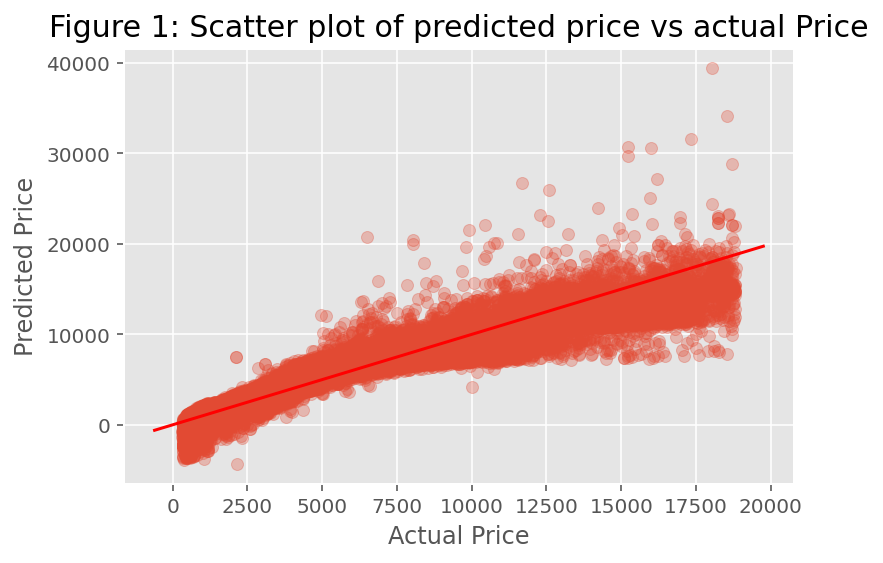

In [44]:
def plot_line(axis, slope, intercept, **kargs):
    xmin, xmax = axis.get_xlim()
    plt.plot([xmin, xmax], [xmin*slope+intercept, xmax*slope+intercept], **kargs)
    
plt.scatter(residuals_full['actual'], residuals_full['predicted'], alpha=0.3);
plot_line(axis=plt.gca(), slope=1, intercept=0, c="red");
plt.xlabel('Actual Price');
plt.ylabel('Predicted Price');
plt.title('Figure 1: Scatter plot of predicted price vs actual Price', fontsize=15);
plt.show();

The scatter plot of predicted price vs actual price clearly shows a positive correlation between the two variables. There are plenty of outliers showing that our model isn’t perfect however there is a clear linear increase on the line of best fit.

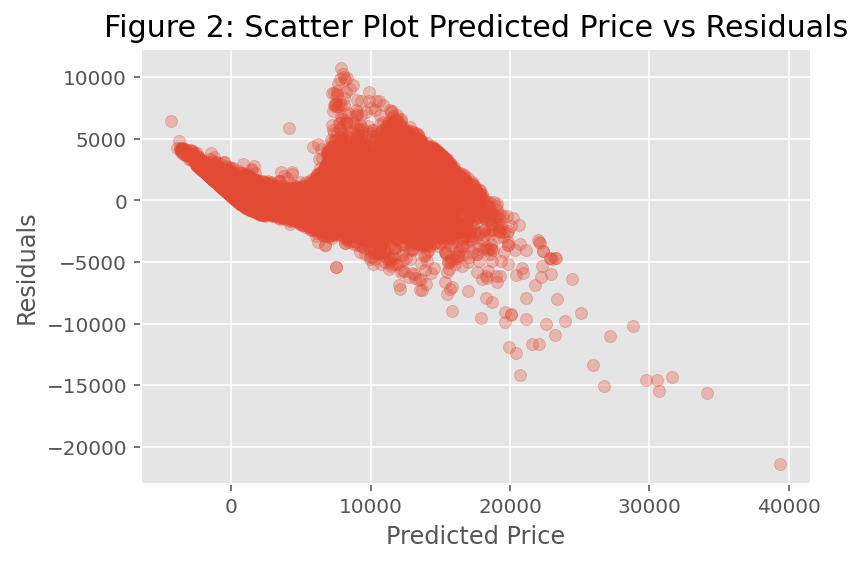

In [27]:
plt.scatter(residuals_full['predicted'], residuals_full['residual'], alpha=0.3);
plt.xlabel('Predicted Price');
plt.ylabel('Residuals')
plt.title('Figure 2: Scatter Plot Predicted Price vs Residuals', fontsize=15)
plt.show();

The residuals around the $10000 predicted price have much larger range of residuals whereas the Extremes of the prices have less of a difference in residuals.

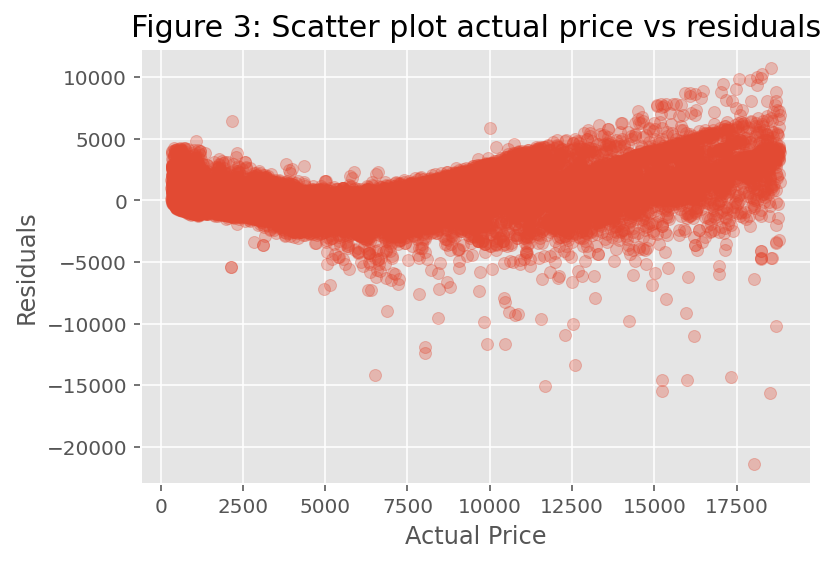

In [28]:
plt.scatter(residuals_full['actual'], residuals_full['residual'], alpha=0.3);
plt.xlabel('Actual Price');
plt.ylabel('Residuals')
plt.title('Figure 3: Scatter plot actual price vs residuals', fontsize=15)
plt.show();

The residuals at either end of the price spectrum are higher than the center between 5000 and 7500

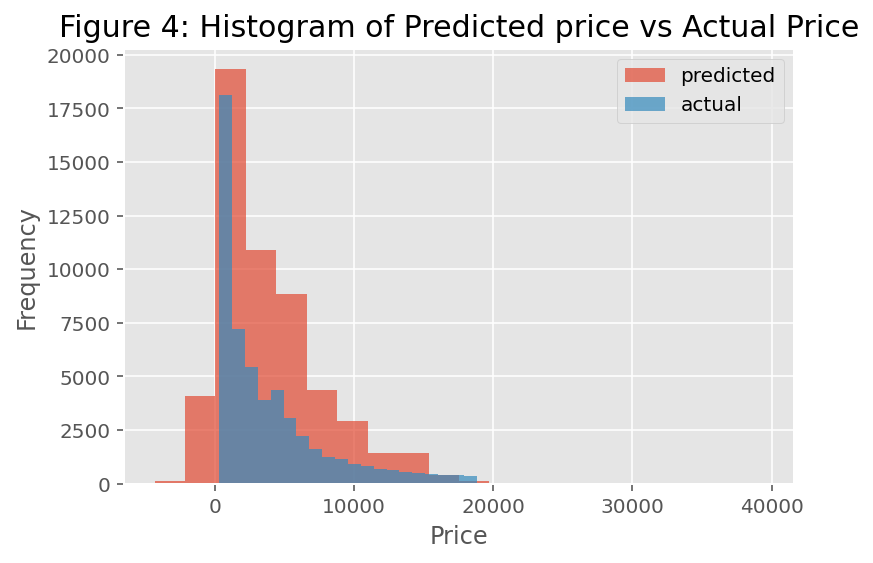

In [29]:
plt.hist(residuals_full['predicted'], label='predicted', bins=20, alpha=0.7);
plt.hist(residuals_full['actual'], label='actual', bins=20, alpha=0.7);
plt.xlabel('Price');
plt.ylabel('Frequency');
plt.title('Figure 4: Histogram of Predicted price vs Actual Price', fontsize=15);
plt.legend()
plt.show();

The actual and predicted prices follow the same trend with predicted having a much higher occurrence.

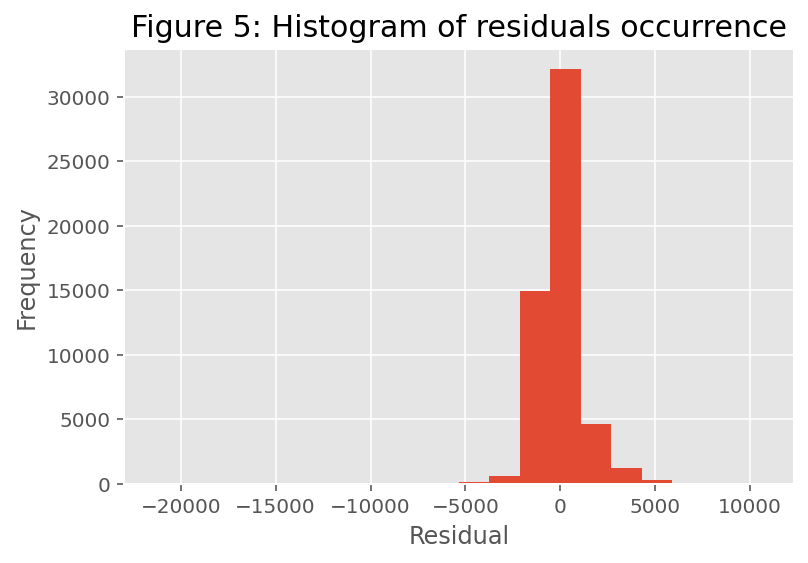

In [30]:
plt.hist(residuals_full['residual'], bins = 20);
plt.xlabel('Residual');
plt.ylabel('Frequency');
plt.title('Figure 5: Histogram of residuals occurrence', fontsize=15);
plt.show();

The mode is slightly to the positive side of zero it is however and almost symmetrical distribution.

In [31]:
patsy_description = patsy.ModelDesc.from_formula(formula_string_encoded)

linreg_fit = model_full_fitted

p_val_cutoff = 0.05

print('\nPerforming backwards feature selection using p-values:')

while True:

    pval_series = linreg_fit.pvalues.drop(labels='Intercept')
    pval_series = pval_series.sort_values(ascending=False)
    term = pval_series.index[0]
    pval = pval_series[0]
    if (pval < p_val_cutoff):
        break
    term_components = term.split(':')
    print(f'\nRemoving term "{term}" with p-value {pval:.4}')
    if (len(term_components) == 1): 
        patsy_description.rhs_termlist.remove(patsy.Term([patsy.EvalFactor(term_components[0])]))    
    else: 
        patsy_description.rhs_termlist.remove(patsy.Term([patsy.EvalFactor(term_components[0]), 
                                                        patsy.EvalFactor(term_components[1])]))    
        
    linreg_fit = smf.ols(formula=patsy_description, data=df_encoded).fit()
    
model_reduced_fitted = smf.ols(formula = patsy_description, data = df_encoded).fit()

print("\n***")
print(model_reduced_fitted.summary())
print("***")
print(f"Regression number of terms: {len(model_reduced_fitted.model.exog_names)}")
print(f"Regression F-distribution p-value: {model_reduced_fitted.f_pvalue:.4f}")
print(f"Regression R-squared: {model_reduced_fitted.rsquared:.4f}")
print(f"Regression Adjusted R-squared: {model_reduced_fitted.rsquared_adj:.4f}")


Performing backwards feature selection using p-values:

Removing term "y" with p-value 0.6192

Removing term "z" with p-value 0.1488

***
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.920
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                 2.944e+04
Date:                Mon, 18 Oct 2021   Prob (F-statistic):               0.00
Time:                        14:44:10   Log-Likelihood:            -4.5573e+05
No. Observations:               53940   AIC:                         9.115e+05
Df Residuals:                   53918   BIC:                         9.117e+05
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025  

The dimensional terms z and y were removed for having p-values above 0.05

In [32]:
residuals_reduced = pd.DataFrame({'actual': df_encoded['price'], 
                            'predicted': model_reduced_fitted.fittedvalues, 
                            'residual': model_reduced_fitted.resid})
residuals_reduced.head(10)


,actual,predicted,residual
0,326,-1346.614726,1672.614726
1,326,-662.895014,988.895014
2,327,215.495406,111.504594
3,334,-830.942042,1164.942042
4,335,-3460.396928,3795.396928
5,336,-1382.081003,1718.081003
6,336,-398.775782,734.775782
7,337,-1073.647468,1410.647468
8,337,-1044.665285,1381.665285
9,338,-418.429847,756.429847


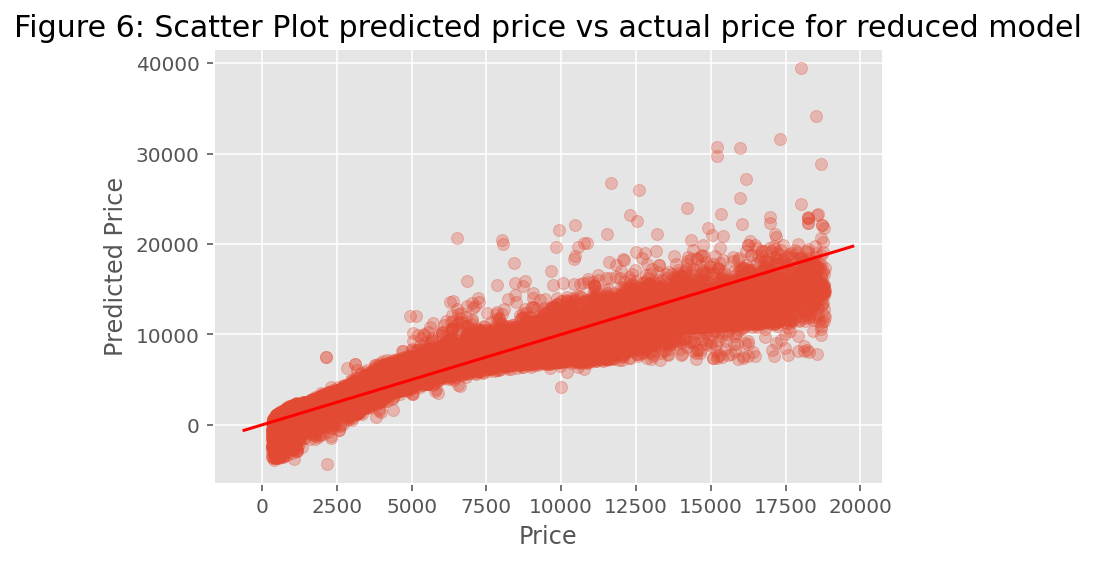

In [37]:
plt.scatter(residuals_reduced['actual'], residuals_reduced['predicted'], alpha=0.3);
plot_line(axis=plt.gca(), slope=1, intercept=0, c="red");
plt.xlabel('Price');
plt.ylabel('Predicted Price');
plt.title('Figure 6: Scatter Plot predicted price vs actual price for reduced model', fontsize=15);
plt.show();

After performing backwards feature selection our graphs do not have any noticeable change.

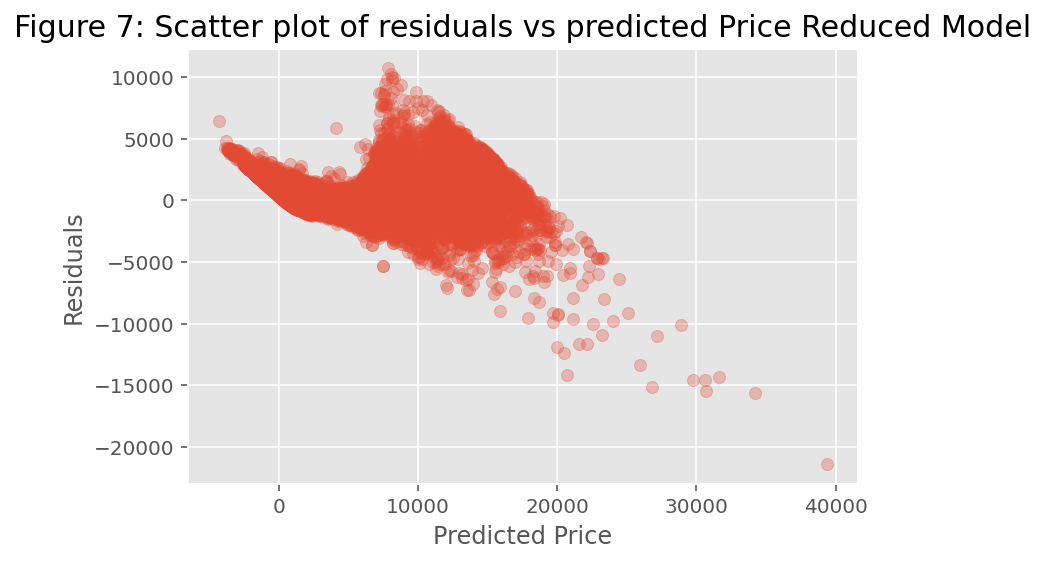

In [34]:
plt.scatter(residuals_reduced['predicted'], residuals_reduced['residual'], alpha=0.3);
plt.xlabel('Predicted Price');
plt.ylabel('Residuals')
plt.title('Figure 7: Scatter plot of residuals vs predicted Price Reduced Model', fontsize=15)
plt.show();

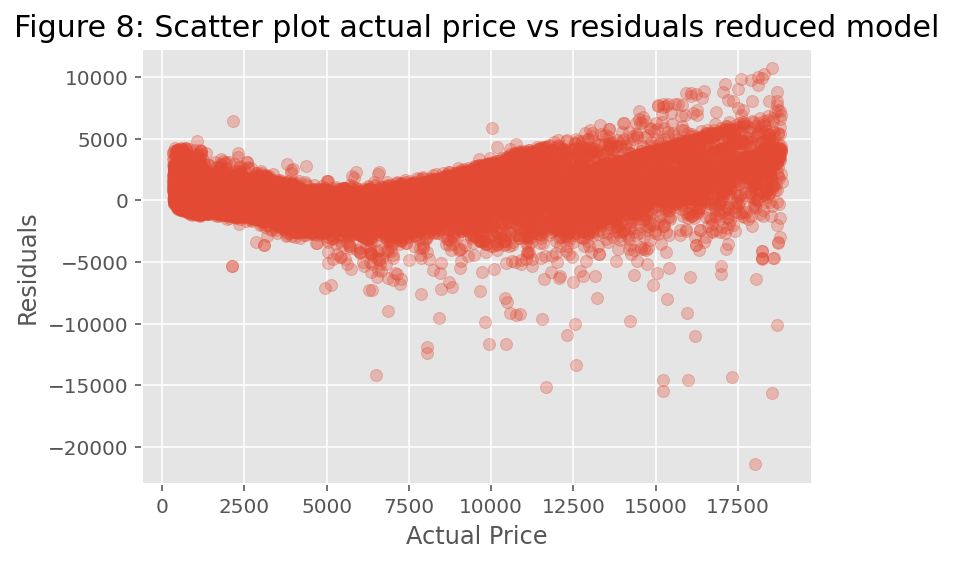

In [45]:
plt.scatter(residuals_reduced['actual'], residuals_reduced['residual'], alpha=0.3);
plt.xlabel('Actual Price');
plt.ylabel('Residuals')
plt.title('Figure 8: Scatter plot actual price vs residuals reduced model', fontsize=15)
plt.show();

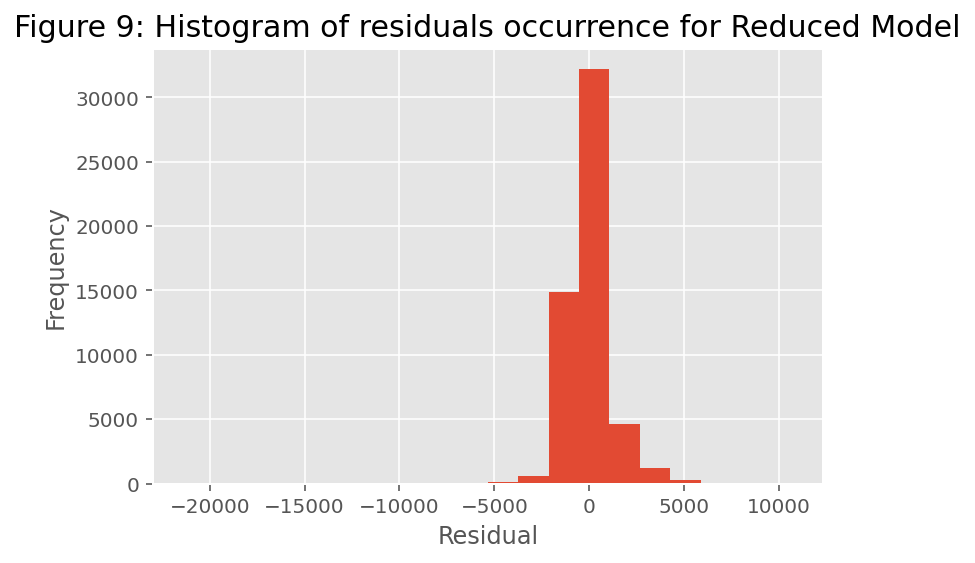

In [46]:
plt.hist(residuals_reduced['residual'], bins = 20);
plt.xlabel('Residual');
plt.ylabel('Frequency');
plt.title('Figure 9: Histogram of residuals occurrence for Reduced Model', fontsize = 15)
plt.show();

## Critique and limitations <a id='crithit'></a>

The main limitations of our study were the large number of variables that we had in relation to diamond specifications. While a large number of variables is not at all an issue usually, we found in our phase 1 report that there was a strong correlation between carat and colour with diamond price. Other than those two specifications, there was not a clear relation between the other diamond specifications. This meant that while helpful to have more data, the semi randomness of the other values gave us many outliers.
The biggest strength of our model is the fact that despite all of our outliers, our approximation of the line of best fit seen in figure 1 and figure 6 has a very clear correlation between our prediction and our actual price.

## Summary and Conclusion <a id='summary'></a>

### Report Summary <a id='rsum'></a>
In phase 1 of this report, we did minimal data cleaning as we only had to rename some of the categorical data to allow for easier understanding. We then graphed the data we had in order to discover which attributes correlated the most heavily with price. From there in report 2 we are trying to predict the data and prices of diamonds by performing multiple linear regression using the data from the diamonds dataset. For the data to be used in multiple linear regression we had to one hot encode the categorical variables, We graphed more of the data and performed multiple linear regression by using ordinary least squares on it to further focus in on the data and gain a more accurate prediction on diamond prices. From there we used backwards feature selection to get rid of any variables with p values greater than the specified target to get more accurate results, in this case 0.05.

### Summary of Findings <a id='findings'></a>

The model found that predicted price could estimate the actual price however towards the lower and higher end of the diamonds price the residuals were larger and therefore estimations were less accurate. The residuals are normally distributed with a mean just above zero. Backwards feature selection removed the dimensional values of z and y for having high p-values this however does not appear to have any significant impact on the prediction model.

### Conclusion <a id='konk'></a>

Statistical modeling is a useful method to predict the value of a dependent variable given explanatory variables. Using multiple linear regression we have a model that predicts the price of diamonds however due to the inclusion of many explanatory variables with no apparent correlation with price which resulted in many outliers and a large spread of residuals makes any prediction made with the model highly uncertain and therefore renders the model invalid for diamond price prediction.